In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
dummies = pd.get_dummies(df["salary"], dtype=int)
dummies
new_df = pd.concat([df, dummies], axis="columns")
new_df.drop("salary", axis="columns")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,0,1,0


In [4]:
retained = new_df[new_df["left"] == 0]
retained.shape

(11428, 13)

In [5]:
sort = df.select_dtypes(include="number").groupby("left").mean()
sort

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


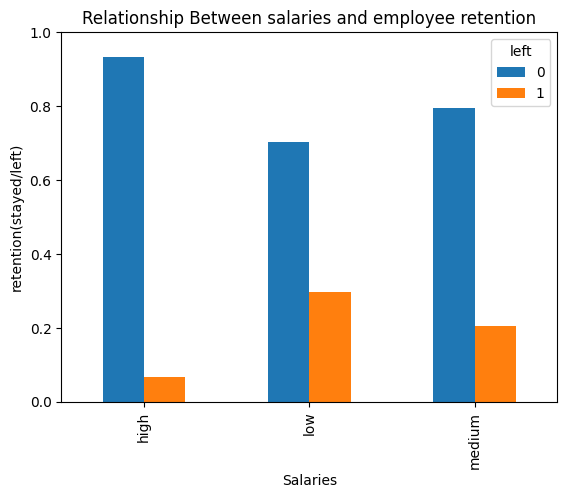

In [51]:
%matplotlib inline
retention = df.groupby("salary")["left"].value_counts(normalize=True).unstack()
retention.plot(kind="bar", stacked=False)
plt.title("Relationship Between salaries and employee retention")
plt.xlabel("Salaries")
plt.ylabel("retention(stayed/left)")
plt.ylim(0,1)
plt.show()

Plot showing Relationship Between salaries and employess retention.

It seems that the higher the salary, the less likely the employee is to leave the company and Vice versa

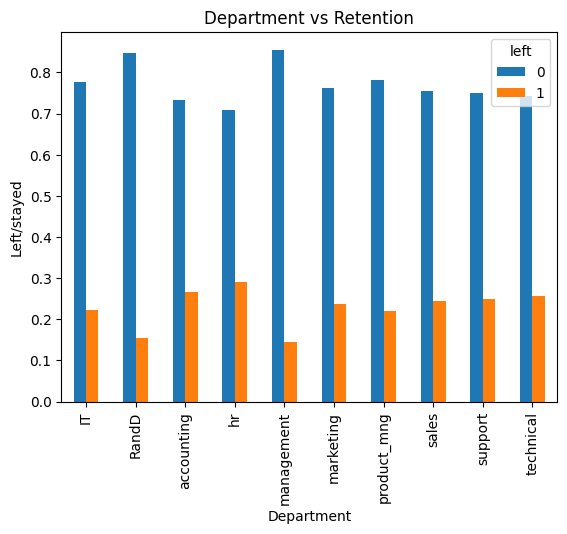

In [25]:
%matplotlib inline
retention2 = df.groupby("Department")["left"].value_counts(normalize=True).unstack()
retention2.plot(kind="bar", stacked=False)
plt.title("Department vs Retention")
plt.xlabel("Department")
plt.ylabel("Left/stayed")
plt.show()


Plot showing the relationship between the Department and the Employee Retention`

It seems to me that there is little or no relationship in how the department determines do who stay or leave but instead other variables like salary, employee satisfaction are the major contributors

In [34]:
final = new_df.drop(["Department","last_evaluation","medium", "salary", "left"], axis=1)
left = new_df["left"]
final

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low
0,0.38,2,157,3,0,0,0,1
1,0.80,5,262,6,0,0,0,0
2,0.11,7,272,4,0,0,0,0
3,0.72,5,223,5,0,0,0,1
4,0.37,2,159,3,0,0,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,0,0,1
14995,0.37,2,160,3,0,0,0,1
14996,0.37,2,143,3,0,0,0,1
14997,0.11,6,280,4,0,0,0,1


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, left, test_size=0.3, random_state=42)
X_test

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low
6723,0.65,5,226,2,1,0,0,0
6473,0.88,3,166,2,0,0,0,1
4679,0.69,3,214,2,0,0,0,1
862,0.41,2,154,3,0,0,0,1
7286,0.87,5,254,2,1,0,0,1
...,...,...,...,...,...,...,...,...
13388,0.85,4,260,3,0,0,0,0
10463,0.21,2,249,3,0,0,0,1
5331,0.78,3,156,3,0,0,0,1
7499,0.93,5,238,2,0,0,0,0


In [46]:
from sklearn import linear_model

In [47]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
reg.score(X_test, y_test)

0.7802222222222223